<a href="https://colab.research.google.com/github/wwillsu/stock_price_prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# description: this program uses an artificial recurrent network (long short term memory (LSTM)) to predict the closing stock price of a ticker
#              (APPL) using the past 60 day stock price.

In [ ]:
# import lib
import math
import yfinance as yf
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# retrieve stock quote from yf
df = yf.download(tickers = 'SPY', period = '10y', interval = '1d')
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-08-01,192.559998,193.759995,191.570007,192.500000,161.125137,189261000
2014-08-04,192.869995,194.300003,192.050003,193.889999,162.288589,91340000
2014-08-05,193.100006,193.600006,191.309998,192.009995,160.715027,152690000
2014-08-06,191.110001,192.889999,191.080002,192.070007,160.765182,94818000
2014-08-07,192.940002,193.130005,190.550003,191.029999,159.894775,135733000
...,...,...,...,...,...,...
2024-07-25,541.349976,547.460022,537.450012,538.409973,538.409973,61158300
2024-07-26,542.280029,547.190002,541.489990,544.440002,544.440002,53763800
2024-07-29,546.020020,547.049988,542.719971,544.760010,544.760010,39515800


In [ ]:
# get the number of rows and columns in the data set
df.shape

(2516, 6)

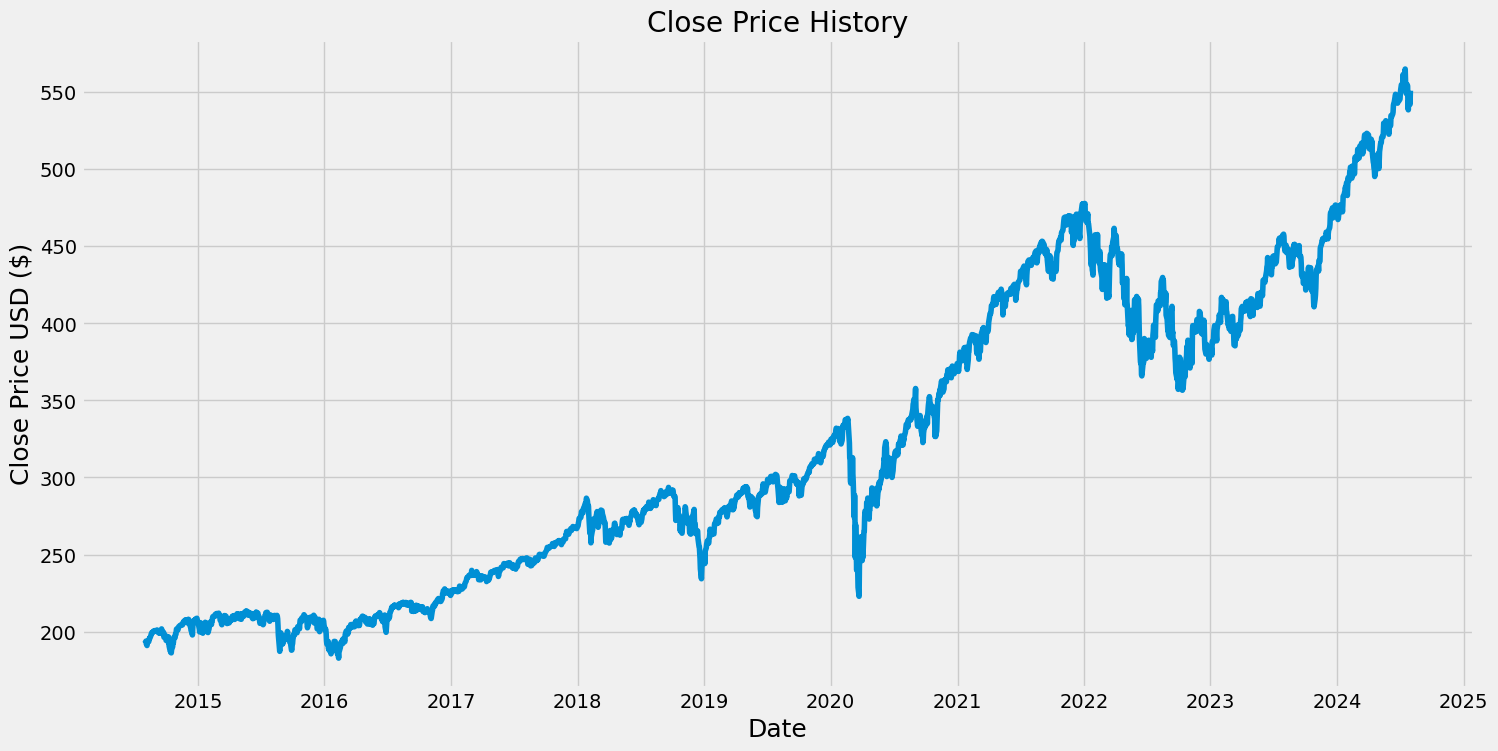

In [ ]:
# visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
# create a new data frame with only the 'close' column
data = df.filter(['Close'])

# convert the dataframe to a numpy array
dataset = data.values

# get the number of rows to train the model on (80%)
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

2013

In [ ]:
# scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.0252356 ],
       [0.02887434],
       [0.02395286],
       ...,
       [0.94738226],
       [0.9401571 ],
       [0.96321993]])

In [ ]:
# create the training data set as the scaled training data set
train_data = scaled_data[0: training_data_len, :]

# split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i - 60: i, 0])
    y_train.append(train_data[i, 0])
    if i <= 60:
        print(x_train)
        print(y_train)
        print()

[array([0.0252356 , 0.02887434, 0.02395286, 0.02410997, 0.02138743,
       0.02717279, 0.02863875, 0.02793193, 0.03136125, 0.03376962,
       0.03366492, 0.03795812, 0.04065445, 0.04204188, 0.04356021,
       0.0427487 , 0.04539266, 0.04573299, 0.04552356, 0.0452356 ,
       0.04672777, 0.04646597, 0.04617801, 0.04541887, 0.04777487,
       0.0464136 , 0.04308902, 0.04505238, 0.04565446, 0.04259164,
       0.04219894, 0.04612564, 0.04683246, 0.04963353, 0.04670156,
       0.04264396, 0.03965967, 0.04371727, 0.03528795, 0.03937171,
       0.0384293 , 0.03706807, 0.03007855, 0.03015708, 0.03575917,
       0.03515705, 0.02722512, 0.0360733 , 0.02586389, 0.02010469,
       0.011911  , 0.01267015, 0.00934553, 0.00892671, 0.01468587,
       0.01947645, 0.02934557, 0.02573299, 0.03159684, 0.03552354])]
[0.03481676330633371]



In [ ]:
# convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
# reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1953, 60, 1)

In [ ]:
# build the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# compile the model
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [ ]:
# train the model
model.fit(x_train, y_train, batch_size = 1, epochs = 1)

1953/1953 ━━━━━━━━━━━━━━━━━━━━ 70s 34ms/step - loss: 0.0018


In [ ]:
# create the testing dataset
# create a new array containing scaled values from index 1953 to 2516
test_data = scaled_data[training_data_len - 60:, :]

# create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i - 60:i, 0])

In [ ]:
# convert the data to numpy array
x_test = np.array(x_test)

In [ ]:
# reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# get the model's predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 82ms/step


In [ ]:
# get the root mean squared error (rmse)
rmse = np.sqrt(np.mean(predictions - y_test) ** 2)
rmse

13.236870221541842

<ipython-input-84-4445b80da24c>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


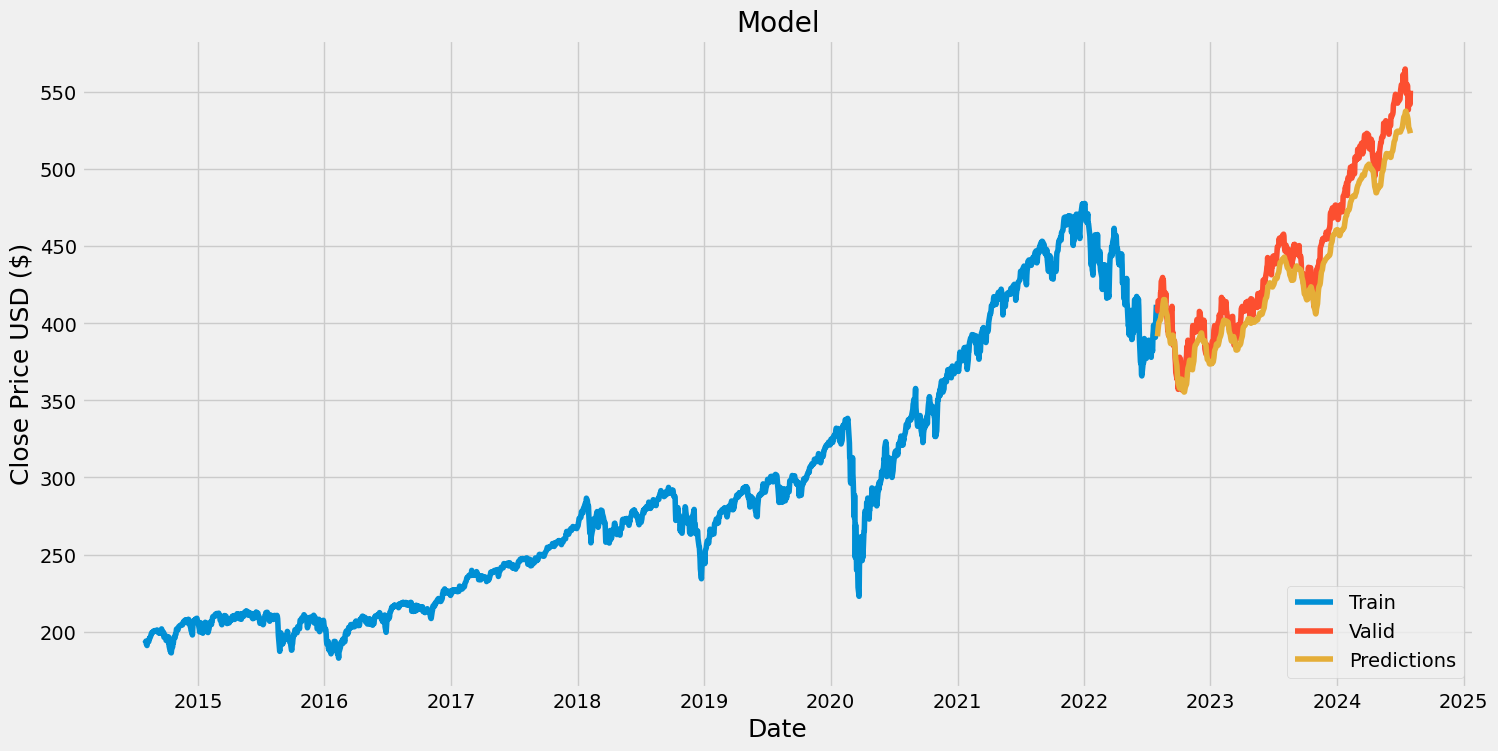

In [ ]:
# plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions

# visualize the data
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize = 18)
plt.ylabel('Close Price USD ($)', fontsize = 18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Valid', 'Predictions'], loc = 'lower right')
plt.show()

In [ ]:
# show the valid and predicted prices
valid

,Close,Predictions
Date,,
2022-08-01,410.769989,391.566406
2022-08-02,408.059998,394.424774
2022-08-03,414.450012,396.397888
2022-08-04,414.170013,398.539948
2022-08-05,413.470001,400.368408
...,...,...
2024-07-25,538.409973,530.111023
2024-07-26,544.440002,527.130493
2024-07-29,544.760010,525.221313


In [ ]:
# get the quote
spy_quote = yf.download(tickers = 'SPY', period = '10y', interval = '1d')

# create a new dataframe
new_df = spy_quote.filter(['Close'])

# get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

# scale the data to be between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

# create an empty list
X_test = []

# append the past 60 days
X_test.append(last_60_days_scaled)

# convert the X_test data set to a numpy array
X_test = np.array(X_test)

# reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# get the predicted scaled price
pred_price = model.predict(X_test)

# undo the scaling
pred_price = scaler.inverse_transform(pred_price)

print(pred_price)

[*********************100%%**********************]  1 of 1 completed


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
[[523.8503]]


In [ ]:
# get the actual quote
spy_quote_actual = yf.download(tickers = 'SPY', period = '1d')
print(spy_quote_actual['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2024-07-31    550.809998
Name: Close, dtype: float64
